In [25]:
#Loading the Reuters dataset
#The data is stored as an array of lists of integers
#Every list is an example of a newswire, encoded in integers, i.e. a map integers to words
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [26]:
#Decoding newswire back into text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decoded(x): #function for translating the newswires back into text
    print(' '.join([reverse_word_index.get(i-3, '?') for i in train_data[x]]))
    return

In [27]:
#Vectorize the data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [28]:
#vectorize the labels
#there are two possibilities
#we use one-hot encoding, i.e. we embed each label as an all-zero vector with 1 in the place of the label index
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

#we could do this also with a built-in way from Keras:
#from keras.utils.np_utils import to_categorical

#one_hot_train_labels1 = to_categorical(train_labels)
#one_hot_test_labels2 = to_categorical(test_labels)

In [29]:
#Defining the model
#We use 64 hidden layers, since 16 could be to limited to learn to seperate 46 different classes
#i.e. information could get lost
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
#we end the network with a Dense layer of size 46, i.e. for each input sample we get a 46dim vector
#each dimension will encode a different output class
#softmax activation will lead to a output of a probability distribution
#each dimension i of the output vector gives us the probability that the sample belongs to class i

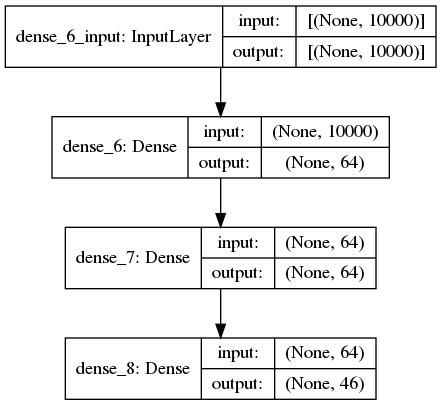

In [30]:
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

plot_model(model, to_file='model.png', show_shapes=True)

In [31]:
#compiling the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [32]:
#setting a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [33]:
#training the model
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 178us/sample - loss: 2.6171 - acc: 0.5357 - val_loss: 1.7123 - val_acc: 0.6340
Epoch 2/20
7982/7982 [==============================] - 1s 143us/sample - loss: 1.4099 - acc: 0.7051 - val_loss: 1.2777 - val_acc: 0.7180
Epoch 3/20
7982/7982 [==============================] - 1s 141us/sample - loss: 1.0370 - acc: 0.7781 - val_loss: 1.1047 - val_acc: 0.7640
Epoch 4/20
7982/7982 [==============================] - 1s 144us/sample - loss: 0.8171 - acc: 0.8237 - val_loss: 1.0125 - val_acc: 0.7780
Epoch 5/20
7982/7982 [==============================] - 1s 142us/sample - loss: 0.6485 - acc: 0.8657 - val_loss: 0.9542 - val_acc: 0.7940
Epoch 6/20
7982/7982 [==============================] - 1s 137us/sample - loss: 0.5210 - acc: 0.8914 - val_loss: 0.9098 - val_acc: 0.8180
Epoch 7/20
7982/7982 [==============================] - 1s 144us/sample - loss: 0.4218 - acc: 0.9099 - val_loss: 0.8955 - va

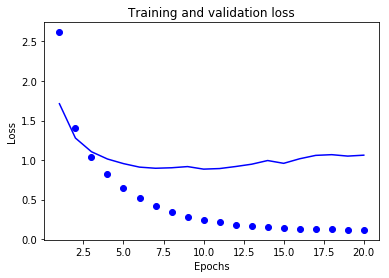

In [34]:
#plotting the training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

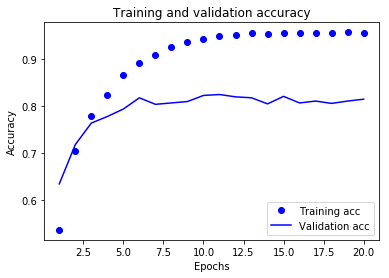

In [35]:
#plotting the training and validation accuracy
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [36]:
#Retraining a model from scratch with less epochs, avoiding overfit
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history1 = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 145us/sample - loss: 2.7503 - acc: 0.4696 - val_loss: 1.8057 - val_acc: 0.6290
Epoch 2/9
7982/7982 [==============================] - 1s 117us/sample - loss: 1.4605 - acc: 0.7083 - val_loss: 1.2862 - val_acc: 0.7250
Epoch 3/9
7982/7982 [==============================] - 1s 115us/sample - loss: 1.0602 - acc: 0.7785 - val_loss: 1.1032 - val_acc: 0.7720
Epoch 4/9
7982/7982 [==============================] - 1s 116us/sample - loss: 0.8278 - acc: 0.8309 - val_loss: 0.9984 - val_acc: 0.7940
Epoch 5/9
7982/7982 [==============================] - 1s 115us/sample - loss: 0.6559 - acc: 0.8653 - val_loss: 0.9427 - val_acc: 0.8060
Epoch 6/9
7982/7982 [==============================] - 1s 116us/sample - loss: 0.5273 - acc: 0.8909 - val_loss: 0.8906 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 115us/sample - loss: 0.4209 - acc: 0.9118 - val_loss: 0.8815 - val_acc: 

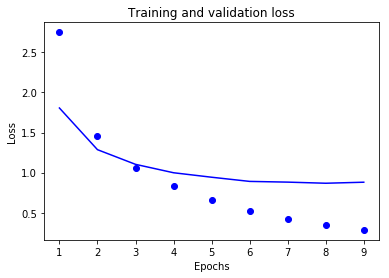

In [37]:
#plotting the training and validation loss of the retrained model
import matplotlib.pyplot as plt

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

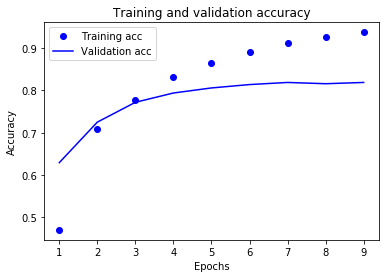

In [38]:
#plotting the training and validation accuracy of the retrained model
plt.clf()

acc = history1.history['acc']
val_acc = history1.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [39]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 109us/sample - loss: 0.9793 - acc: 0.7850


In [40]:
#generate predictions for new data
predictions = model.predict(x_test)
predictions[0]

array([1.23395832e-04, 2.54974497e-04, 1.78962597e-04, 6.98139369e-01,
       2.61350989e-01, 6.44218289e-06, 5.37351880e-04, 6.77057396e-05,
       9.73193534e-03, 3.26048139e-05, 2.11758597e-04, 3.17335734e-03,
       1.88556034e-04, 3.26116267e-03, 8.35275336e-04, 2.28997633e-05,
       5.64683136e-03, 7.73806241e-04, 1.47142404e-04, 2.58418010e-03,
       1.92735135e-03, 9.07514943e-04, 2.13016920e-05, 2.34550243e-04,
       1.58672323e-04, 1.12357586e-04, 2.95387986e-06, 2.97915358e-05,
       4.41029115e-05, 6.97271666e-04, 6.16441073e-04, 1.44028384e-03,
       4.60087846e-04, 2.25154472e-05, 1.48040548e-04, 1.41513356e-05,
       3.42440302e-03, 2.13741878e-04, 4.03938757e-05, 9.82705038e-04,
       2.78881125e-05, 1.13537104e-03, 2.18051741e-06, 3.08300187e-05,
       2.03363379e-05, 1.59104256e-05], dtype=float32)

In [23]:
np.argmax(predictions[0])

3